In [14]:
import numpy as np
from scipy.linalg import toeplitz
import matplotlib.pyplot as plt
from PIL import Image

## Pupil Function

In [15]:
from scipy import ndimage, misc
def create_angle_split(image_size, h, w, ho, wo, angle):
    arr = np.zeros((image_size,image_size))
    half = image_size//2
    arr[half+ho-h:half+h+ho, half-w+wo:half+w+wo] = 1
    arr = ndimage.rotate(arr, angle, order=1, reshape=False)
    arr[arr>0]=1
    
    return arr

def create_circular_mask(h, w, center=None, radius=None):

    if center is None: # use the middle of the image
        center = (int(w/2), int(h/2))
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= radius
    return mask

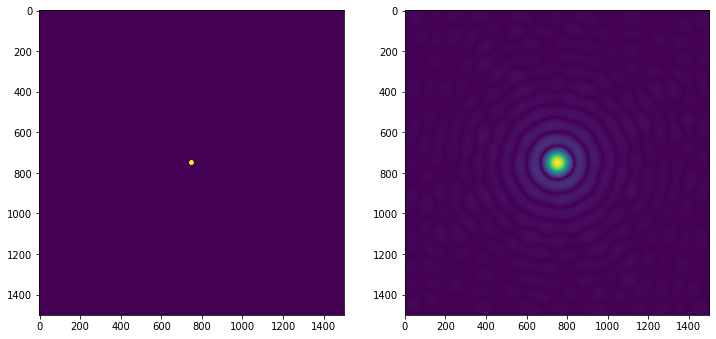

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 24))
aprtr = np.asarray(Image.open("aperture5.jpg")) / 255.0
ax1.imshow(aprtr)

afft = np.abs(np.fft.fft2(np.round(aprtr).astype(float)))
ax2.imshow(np.fft.fftshift(afft))

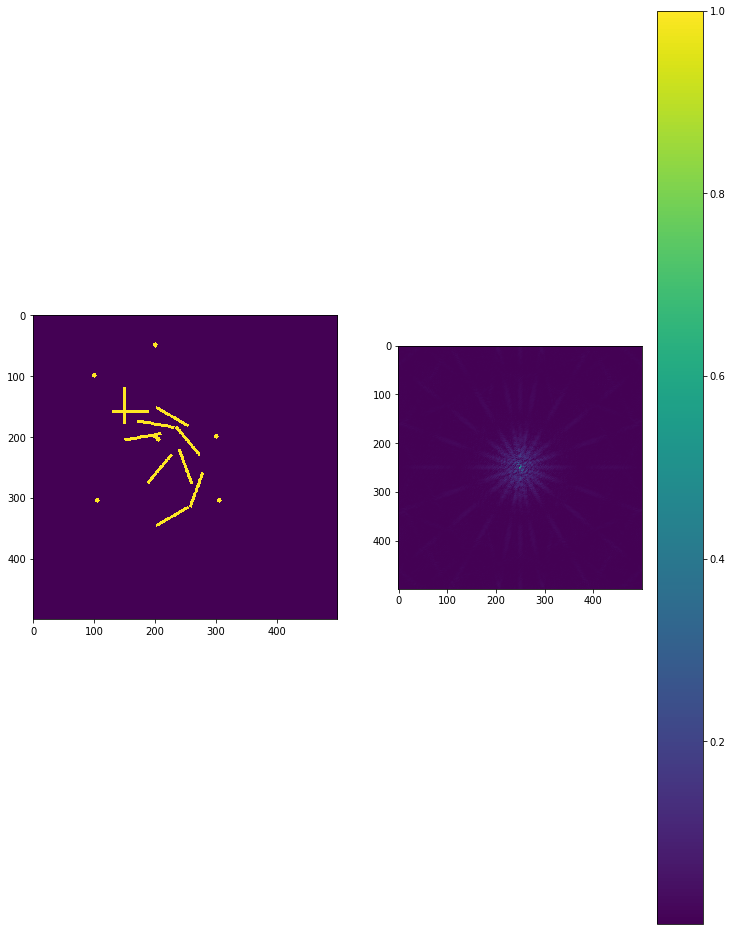

In [17]:
imsz = 500 
h = 30
w = 2
arr1 = create_angle_split(imsz, h, w, 0, 0, 20)
arr2 = create_angle_split(imsz, h, w, 30, 30, -20)
arr3 = create_angle_split(imsz, h, w, -30, 30, 40)
arr4 = create_angle_split(imsz, h, w, 30, -30, -40)
arr5 = create_angle_split(imsz, h, w, -60, 60, 60)
arr6 = create_angle_split(imsz, h, w, 60, 60, -60)
arr7 = create_angle_split(imsz, h, w, -60, 60, 80)
arr8 = create_angle_split(imsz, h, w, 60, -60, -80)
arr9 = create_angle_split(imsz, h, w, 90, -90, -90)
arr0 = create_angle_split(imsz, h, w, 100, 100, 180)
c = create_circular_mask(imsz, imsz, radius=4, center=(200, 50))
c += create_circular_mask(imsz, imsz, radius=4, center=(200, 200))
c += create_circular_mask(imsz, imsz, radius=4, center=(205, 205))
c += create_circular_mask(imsz, imsz, radius=4, center=(100, 100))
c += create_circular_mask(imsz, imsz, radius=4, center=(105, 305))
c += create_circular_mask(imsz, imsz, radius=4, center=(300, 200))
c += create_circular_mask(imsz, imsz, radius=4, center=(305, 305))

arr = arr1 + arr2 + arr3 + arr4 + arr5 + arr6 + arr7 + arr8 + arr9 + arr0 + c
arr[arr>0] = 1
arr_fft = np.abs(np.fft.fft2(arr.astype(float))) 
arr_fft = arr_fft / np.max(arr_fft)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 24))
ax1.imshow(arr)
im = ax2.imshow(np.fft.fftshift(arr_fft))
fig.colorbar(im)

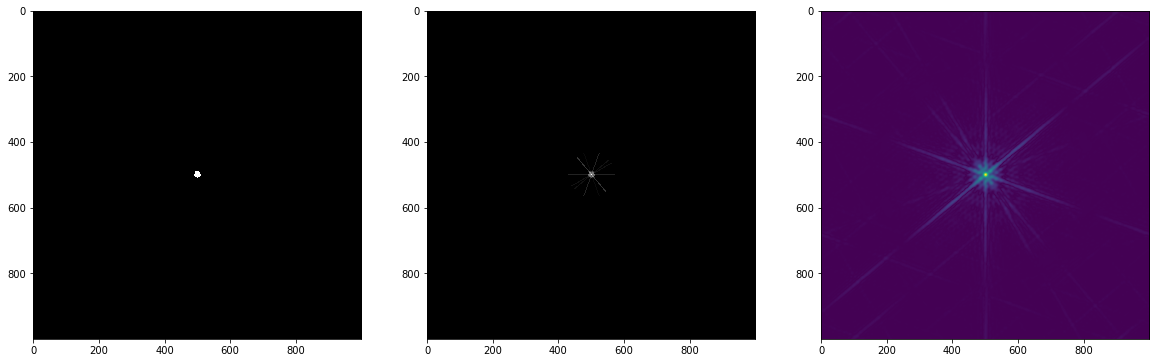

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 54))

image = np.asarray(Image.open("pentbig6.jpg")) / 255.0
ax1.imshow(np.round(image), cmap="gray")

ims = 1000
h = 70
w = 1
im2 = image + create_angle_split(ims, h, w, 0, 0, 20) * 6
im2 += create_angle_split(ims, h, w, 0, 0, -20) * 20
im2 += create_angle_split(ims, h, w, 0, 0, 40) * 30
im2 += create_angle_split(ims, h, w, 0, 0, -50) * 10
im2 += create_angle_split(ims, h, w, 0, 0, 90) * 20
im2 += create_angle_split(ims, h, w, 0, 0, -60) * 10
im2 += image * 50

ax2.imshow(np.round(im2), cmap="gray")

arr = np.abs(np.fft.fft2(np.round(im2).astype(float)))
ax3.imshow(np.fft.fftshift(arr))


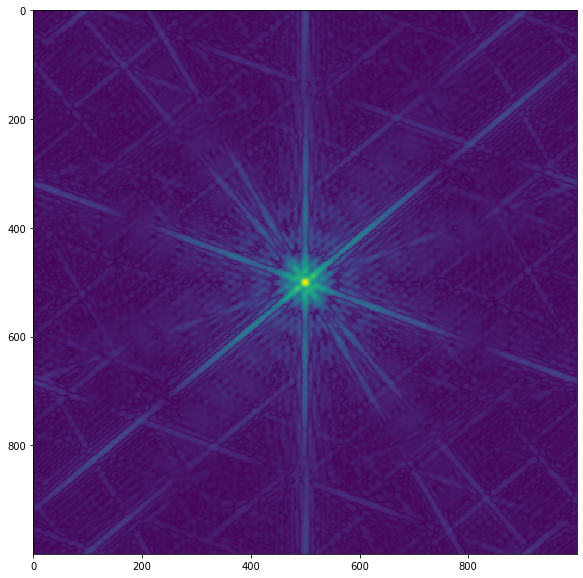

In [19]:
plt.figure(figsize=(10,10))
plt.imshow(np.sqrt(np.fft.fftshift(arr)))

(1.0, 0.0)

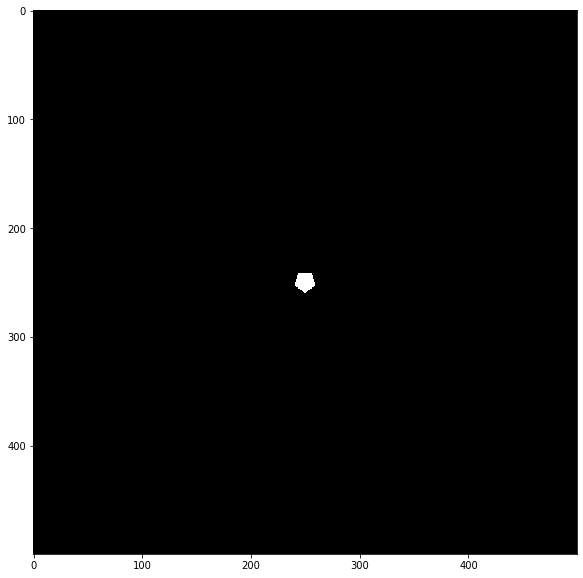

In [20]:
image = np.asarray(Image.open("pent3.jpg")) / 255.0
plt.figure(figsize=(10,10))
plt.imshow(np.round(image), cmap="gray")
np.max(image), np.min(image)

(112.0, 0.0)

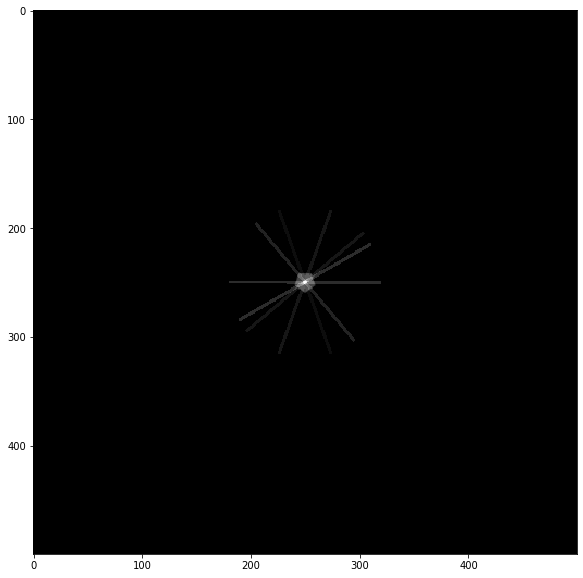

In [21]:
h = 70
w = 1
im2 = image + create_angle_split(500, h, w, 0, 0, 20) * 6
im2 = im2 + create_angle_split(500, h, w, 0, 0, -20) * 10
im2 = im2 + create_angle_split(500, h, w, 0, 0, 40) * 15
im2 = im2 + create_angle_split(500, h, w, 0, 0, -50) * 10
im2 = im2 + create_angle_split(500, h, w, 0, 0, 90) * 20
im2 = im2 + create_angle_split(500, h, w, 0, 0, -60) * 20
im2 += image * 30
# im2 = np.max(im2)"" - im2
# print(np.max(im2))
# im2 = im2 + create_angle_split(500, 30, w, 0, 0, 70)
# im2 = im2 + create_angle_split(500, 30, w, -30, -30, -20)
plt.figure(figsize=(10,10))
plt.imshow(np.round(im2), cmap="gray")
np.max(im2), np.min(im2)

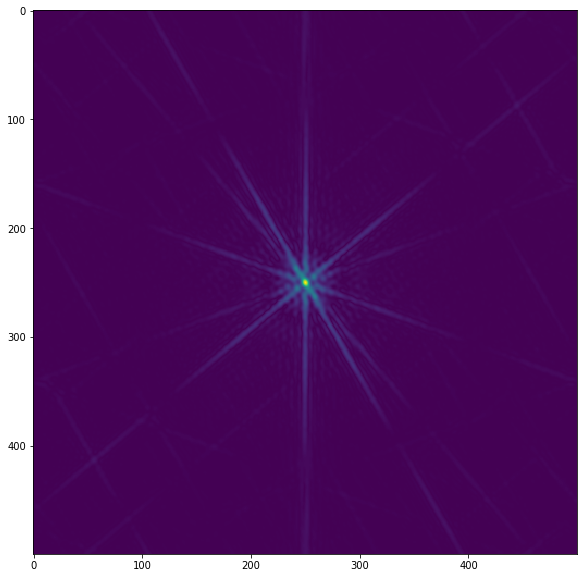

In [22]:
plt.figure(figsize=(10,10))
arr = np.abs(np.fft.fft2(np.round(im2).astype(float)))
plt.imshow(np.fft.fftshift(arr))

In [25]:
origin = (200, 100)
depth = 300

def create_phase_matrix(width, lr_shift, ud_shift):
    k = np.arange(-width//2, width//2) * (1.0 / width)
    kx, ky = np.meshgrid(k, k)

    return np.exp(1j * 2 * np.pi * (kx * lr_shift + ky * ud_shift)).astype('complex')

def create_df_phase(width, wavelength, R, z0):
    wavenumber = 2 * np.pi / wavelength
    wv550 = 2 * np.pi / 550.0e-9
    
    k = np.arange(-width//2, width//2) * (1.0 / width)
    kx, ky = np.meshgrid(k, k)
    
    r_xy = np.sqrt(kx * kx + ky * ky) / R
    
    W_m = np.random.normal(0, 5 / wv550, 1)
    
    return np.exp(1j * np.pi)

[1.57424244e-04 1.57461217e-04 3.22939183e-04 ... 1.25505162e+01
 1.27858726e+01 1.33559351e+01]


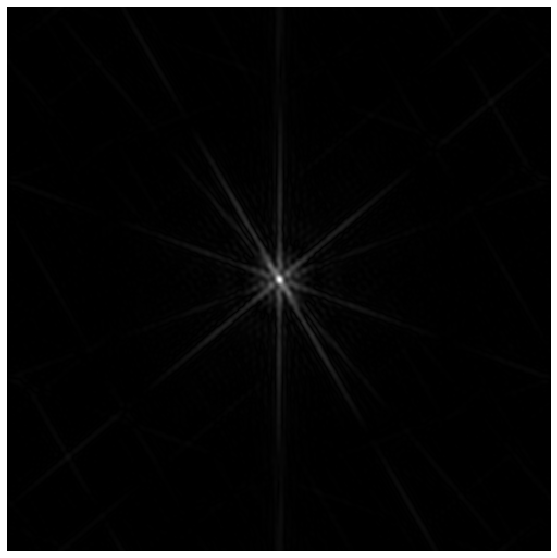

In [27]:
plt.figure(figsize=(10,10))
t = np.fft.fftshift(arr) * 550e-9
tr = np.repeat(np.expand_dims(t, axis=2), 3, axis=2)

im2p = im2.astype("complex64") * create_df_phase(500, 550e-9, 500, 1)
arr2 = np.abs(np.fft.fft2(im2p))
s = np.fft.fftshift(arr2) * 750e-9
sr = np.repeat(np.expand_dims(s, axis=2), 3, axis=2)

lambda550 = np.array([1, 1, 1]) * 255;
lambda0 = np.array([1, 1, 1]) * 255;

trgb = tr * lambda550 + sr * lambda0
print(np.unique(trgb))
plt.imshow((trgb * (255.0 / np.max(trgb))).astype(np.uint8))
plt.axis('off')
plt.savefig("test.png", bbox_inches='tight')
# plt.colorbar()

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
False True


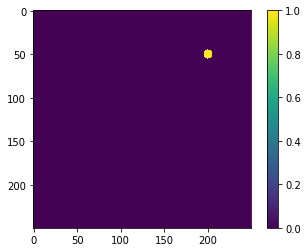

In [48]:
aperature_function = create_circular_mask(250, 250, radius=5, center=(200, 50))
print(aperature_function)
# aperature_function = np.zeros((250,250))
# aperature_function[100:150, 120:130] = 1

print(np.min(aperature_function), np.max(aperature_function))
plt.imshow(aperature_function.astype(np.uint8))
plt.colorbar()

In [49]:
slit = create_angle_split(250, 250, 2, 200)
plt.imshow(slit.astype(np.uint8))
plt.colorbar()

TypeError: create_angle_split() missing 2 required positional arguments: 'wo' and 'angle'

In [50]:
circle_slit = aperature_function + slit + create_circular_mask(250, 250, radius=5, center=(50, 200))
plt.imshow(circle_slit.astype(np.uint8))
plt.colorbar()

NameError: name 'slit' is not defined

In [51]:
circle_fourier = np.abs(np.fft.fft2(circle_slit.astype(float))) ** 2
plt.imshow(np.fft.fftshift(circle_fourier))
plt.colorbar()

NameError: name 'circle_slit' is not defined

(1.0, 0.0)

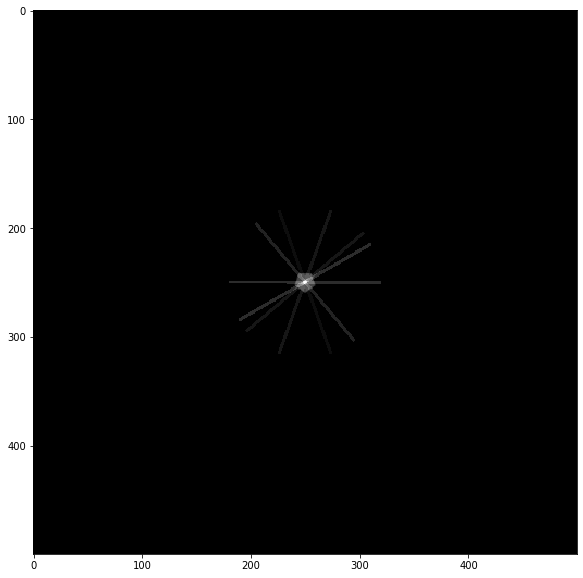

In [52]:
plt.figure(figsize=(10,10))
plt.imshow(np.round(im2), cmap="gray")
np.max(image), np.min(image)

<Figure size 720x720 with 0 Axes>

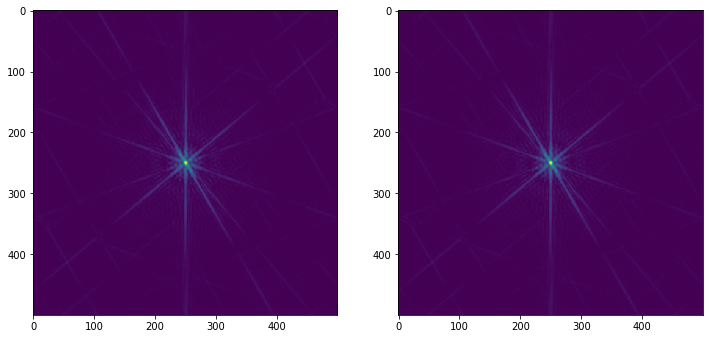

In [53]:
plt.figure(figsize=(10,10))
im2p = im2.astype("complex64")
arr = np.abs(np.fft.fft2(im2p))
arr = arr / np.max(arr)

im2p = im2.astype("complex64") * create_df_phase(500, 550e-9, 500, 1)
arr2 = np.abs(np.fft.fft2(im2p))
arr2 = arr2 / np.max(arr2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 24))

ax1.imshow(np.fft.fftshift(arr))
ax2.imshow(np.fft.fftshift(arr2))

In [54]:
np.random.normal(0, 1, 1)

array([-0.43572178])

In [55]:
phase = create_phase_matrix(250,50,-50)
pupil_func = circle_slit.astype(np.complex64) * phase

np.info(pupil_func)


t = np.abs(np.fft.fft2(pupil_func)) ** 2
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 24))

ax1.imshow(np.fft.fftshift(t))
ax2.imshow(np.fft.fftshift(circle_fourier))

NameError: name 'circle_slit' is not defined

## Spectral Response Function

In [56]:
from scipy.stats import norm

In [57]:
wavelengths = np.arange(380, 745, 5)

In [58]:
mu_R = np.random.uniform(620, 640, 1)
mu_G = np.random.uniform(540, 560, 1)
mu_B = np.random.uniform(460, 480, 1)

sigma_R = np.random.uniform(50, 60, 1)
sigma_G = np.random.uniform(50, 60, 1)
sigma_B = np.random.uniform(50, 60, 1)

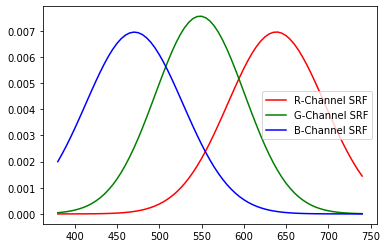

In [59]:
# Example SRF
plt.plot(wavelengths, norm.pdf(wavelengths, mu_R, sigma_R), color='r', label='R-Channel SRF')
plt.plot(wavelengths, norm.pdf(wavelengths, mu_G, sigma_G), color='g', label='G-Channel SRF')
plt.plot(wavelengths, norm.pdf(wavelengths, mu_B, sigma_B), color='b', label='B-Channel SRF')
plt.legend()

In [60]:
SRF_R = norm.pdf(wavelengths, mu_R, sigma_R)[None, :]
SRF_G = norm.pdf(wavelengths, mu_G, sigma_G)[None, :]
SRF_B = norm.pdf(wavelengths, mu_B, sigma_B)[None, :]

In [61]:
SRF = np.concatenate((SRF_R, SRF_G, SRF_B), axis=0)
SRF.shape

(3, 73)

## Combining

In [74]:
pupil_fourier = np.fft.fftshift(arrf)
psf = np.repeat(np.expand_dims(pupil_fourier, axis=0), 73, axis=0)
psf = psf.reshape(73, -1)

NameError: name 'arrf' is not defined

In [75]:
psf_rgb = (SRF @ psf)

In [76]:
psf_rgb = psf_rgb.reshape(3, 500, 500)

In [77]:
psf_rgb = psf_rgb / np.max(psf_rgb)

In [78]:
psf_rgb

array([[[1.83820745e-03, 1.51061952e-03, 6.71331271e-04, ...,
         3.52168971e-04, 6.71329978e-04, 1.51061716e-03],
        [1.58488679e-03, 1.12585630e-03, 2.75936648e-04, ...,
         1.71995757e-04, 8.31832797e-04, 1.46309978e-03],
        [9.45762192e-04, 5.05863363e-04, 1.62904166e-04, ...,
         2.56760369e-04, 6.85589104e-04, 1.00014144e-03],
        ...,
        [2.20121229e-04, 3.22550699e-04, 2.84525969e-04, ...,
         5.89813117e-04, 3.69340978e-04, 1.00010235e-04],
        [9.45761068e-04, 1.00014302e-03, 6.85590397e-04, ...,
         7.20054690e-04, 1.62905319e-04, 5.05861676e-04],
        [1.58488567e-03, 1.46310158e-03, 8.31833697e-04, ...,
         5.99200328e-04, 2.75936198e-04, 1.12585372e-03]],

       [[1.90282334e-03, 1.56372017e-03, 6.94929622e-04, ...,
         3.64548265e-04, 6.94928283e-04, 1.56371773e-03],
        [1.64059806e-03, 1.16543192e-03, 2.85636255e-04, ...,
         1.78041679e-04, 8.61073029e-04, 1.51453004e-03],
        [9.79007222e-04, 

In [79]:
psf_rgb.shape

(3, 500, 500)

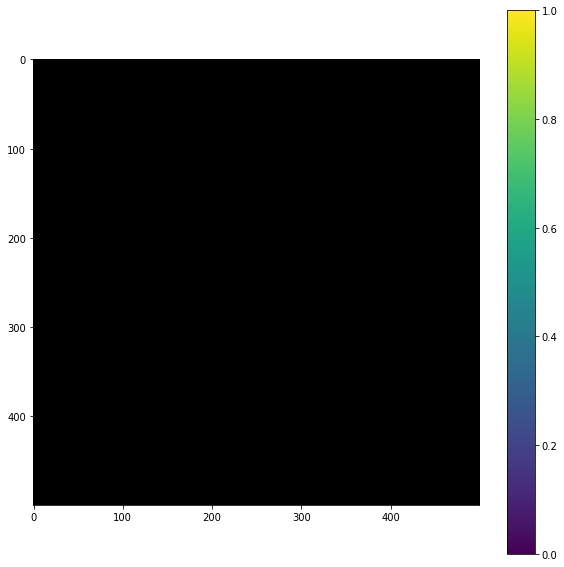

In [80]:
plt.figure(figsize=(10,10))
plt.imshow(np.transpose(psf_rgb.astype(np.uint8), (1, 2, 0)))
plt.colorbar()

## Ghost

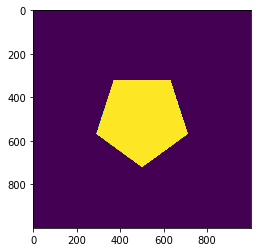

In [83]:
image = np.asarray(Image.open("pentbig2.jpg")) / 255.0
plt.imshow(image)